In [6]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
juno = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0 AND hvfhs_license_num = 'HV0002'
    GROUP BY hour
    ORDER BY hour
""")

In [8]:
uber = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0 AND hvfhs_license_num = 'HV0003'
    GROUP BY hour
    ORDER BY hour
""")

In [9]:
via = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0 AND hvfhs_license_num = 'HV0004'
    GROUP BY hour
    ORDER BY hour
""")

In [10]:
lyft = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0 AND hvfhs_license_num = 'HV0005'
    GROUP BY hour
    ORDER BY hour
""")

In [11]:
juno_df = juno.df()
uber_df = uber.df()
via_df = via.df()
lyft_df = lyft.df()

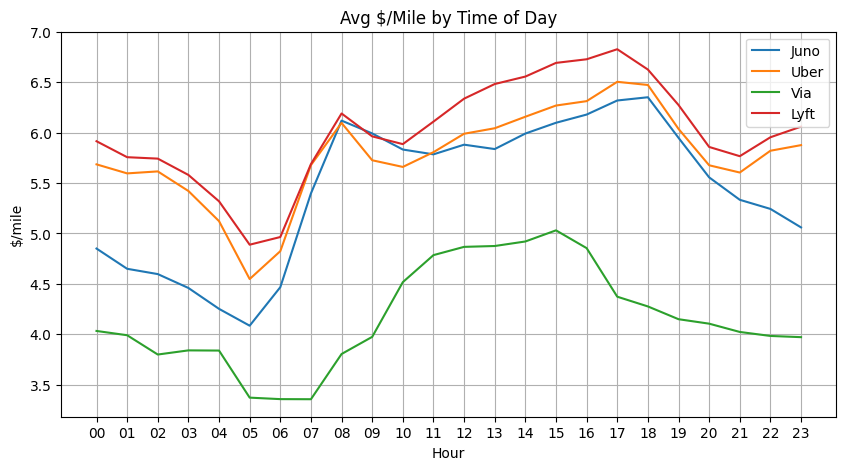

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(juno_df['hour'], juno_df['avg_fare_per_mile'], label='Juno')
plt.plot(uber_df['hour'], uber_df['avg_fare_per_mile'], label='Uber')
plt.plot(via_df['hour'], via_df['avg_fare_per_mile'], label='Via')
plt.plot(lyft_df['hour'], lyft_df['avg_fare_per_mile'], label='Lyft')

plt.xlabel("Hour")
plt.ylabel("$/mile")
plt.title("Avg $/Mile by Time of Day")
plt.xticks(range(0, 24)) 
plt.grid(True)
plt.legend()
plt.show()